In [67]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Set the file path (update with your actual file location)
file_path = "/content/drive/My Drive/mnist_784.csv"

# Load CSV
mnist_data = pd.read_csv(file_path)

print("CSV Loaded Successfully!")
print(mnist_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV Loaded Successfully!
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0  

In [69]:
# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [70]:
# Print the column names to check for the correct label column
print(mnist_data.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [71]:
# Split into features and labels (adjust the label column name if necessary)
# Assuming the label column is named 'class' or something else
df_data = mnist_data.drop(columns=[mnist_data.columns[-1]])  # Drop the last column (assuming it's the label)
df_labels = mnist_data[mnist_data.columns[-1]]  # The label is the last column

In [72]:
# Normalize the pixel values to range [0, 1]
df_data = df_data / 255.0

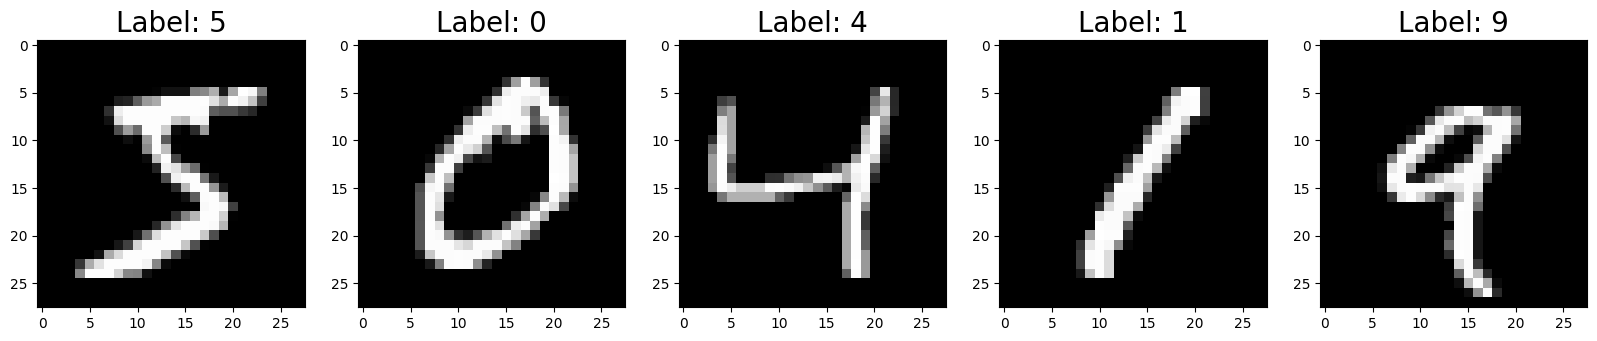

In [73]:
# Display sample images with labels
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(df_data.iloc[:5].values, df_labels.iloc[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f"Label: {label}", fontsize=20)
plt.show()

In [74]:
# Extract a subset of the data for faster processing
df_data_subset = df_data.iloc[:20000].copy()
df_labels_subset = df_labels.iloc[:20000].copy()

In [75]:
# Split the dataset into training and testing sets
train_image, test_image, train_label, test_label = train_test_split(
    df_data_subset, df_labels_subset, test_size=0.3, random_state=0
)

In [76]:
# Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')

In [77]:
# Fit the model on the training data
logreg.fit(train_image, train_label)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [78]:
# Test prediction
sample_index = 0
print(f"True label: {test_label.iloc[sample_index]}")
predicted_label = logreg.predict(test_image.iloc[sample_index].values.reshape(1, -1))
print(f"Predicted label: {predicted_label[0]}")

True label: 6
Predicted label: 6


In [79]:
# Calculate accuracy
accuracy = logreg.score(test_image, test_label)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9132


In [80]:
X = mnist_data.iloc[:, 1:].values  # Features (images)
y = mnist_data.iloc[:, 0].values   # Labels (digits)


In [81]:
X = mnist_data.iloc[:, :-1].values  # Features (images)
y = mnist_data.iloc[:, -1].values   # Labels (digits)


In [82]:
print(f"Original Data Shape: {X.shape}")

Original Data Shape: (70000, 784)


In [83]:
# Standardize the data (Important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# Apply PCA (Reduce to 100 principal components)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

In [85]:
print(f"Total Variance Retained: {np.sum(pca.explained_variance_ratio_):.4f}")

Total Variance Retained: 0.7038


In [86]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [87]:
# Train Logistic Regression (After PCA)
logreg_pca = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg_pca.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [88]:
# Evaluate Model Performance
y_pred = logreg_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy After PCA: {accuracy_pca:.4f}")

Accuracy After PCA: 0.9163


In [89]:
# Visualize Original vs. PCA-Reconstructed Image
index = 0  # Change to any sample index
reconstructed = pca.inverse_transform(X_pca[index]).reshape(28, 28)

plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Original Image')

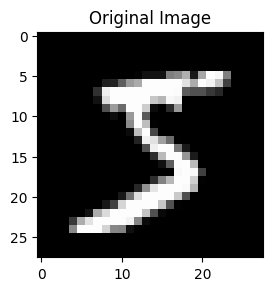

In [90]:
plt.subplot(1, 2, 1)
plt.imshow(X[index].reshape(28, 28), cmap='gray')
plt.title("Original Image")

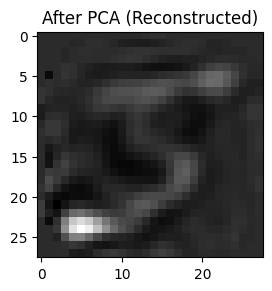

In [91]:
# 🔹 PCA Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title("After PCA (Reconstructed)")

plt.show()

Check PCA-Reconstructed Image Quality

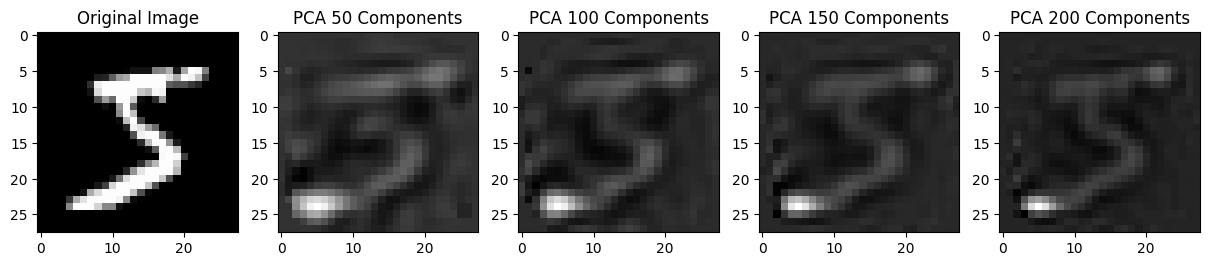

In [92]:
components_list = [50, 100, 150, 200]  # Different levels of PCA reduction
fig, axes = plt.subplots(1, len(components_list) + 1, figsize=(15, 5))

# Original Image
axes[0].imshow(X[0].reshape(28, 28), cmap='gray')
axes[0].set_title("Original Image")

# PCA Transformed and Reconstructed Images
for i, comp in enumerate(components_list):
    pca = PCA(n_components=comp)
    X_pca = pca.fit_transform(X_scaled)
    reconstructed = pca.inverse_transform(X_pca[0]).reshape(28, 28)

    axes[i + 1].imshow(reconstructed, cmap='gray')
    axes[i + 1].set_title(f"PCA {comp} Components")

plt.show()


Predict Digits Using a Classifier

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2058
           1       0.95      0.97      0.96      2364
           2       0.91      0.89      0.90      2133
           3       0.89      0.88      0.88      2176
           4       0.93      0.93      0.93      1936
           5       0.88      0.87      0.87      1915
           6       0.94      0.95      0.95      2088
           7       0.92      0.93      0.93      2248
           8       0.88      0.87      0.87      1992
           9       0.90      0.90      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



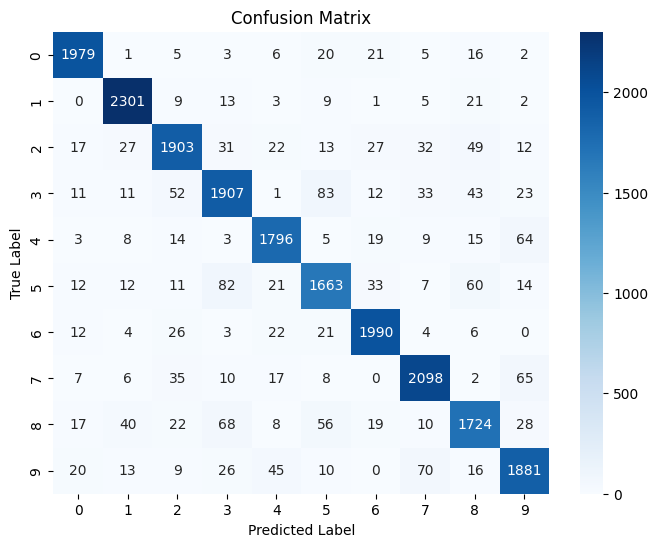

In [93]:
# Predict test labels
y_pred = logreg_pca.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

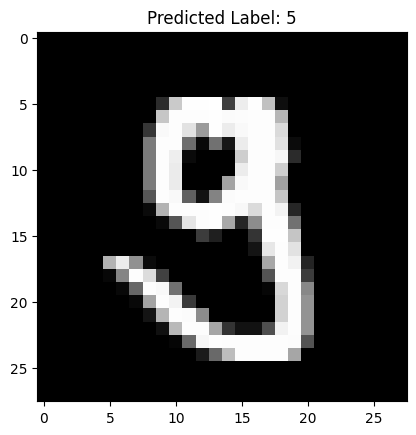

In [94]:
# Select a random test image
idx = random.randint(0, len(X_test) - 1)
test_sample = X_test[idx].reshape(1, -1)

# Predict label
predicted_label = logreg_pca.predict(test_sample)[0]

# Show the image and prediction
plt.imshow(X[idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

Support Vector Machine (SVM)

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM model
svm_model = SVC(kernel='rbf', C=10, gamma='scale')  # RBF Kernel for non-linear decision boundary
svm_model.fit(train_image, train_label)

# Predict and evaluate
svm_predictions = svm_model.predict(test_image)
svm_accuracy = accuracy_score(test_label, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 0.9760


K-Nearest Neighbors (KNN)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 is a good starting point
knn_model.fit(train_image, train_label)

# Predict and evaluate
knn_predictions = knn_model.predict(test_image)
knn_accuracy = accuracy_score(test_label, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.9565


Convolutional Neural Network (CNN)

In [98]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Reshape data for CNN (28x28 grayscale images)
X_train_reshaped = train_image.to_numpy().reshape(-1, 28, 28, 1) / 255.0
X_test_reshaped = test_image.to_numpy().reshape(-1, 28, 28, 1) / 255.0


# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile and train
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, train_label, epochs=5, validation_data=(X_test_reshaped, test_label))

# Evaluate
cnn_accuracy = cnn_model.evaluate(X_test_reshaped, test_label, verbose=0)[1]
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.2034 - loss: 2.1427 - val_accuracy: 0.7912 - val_loss: 0.6230
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.8389 - loss: 0.5208 - val_accuracy: 0.8860 - val_loss: 0.3886
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8910 - loss: 0.3557 - val_accuracy: 0.9127 - val_loss: 0.2954
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9147 - loss: 0.2747 - val_accuracy: 0.9265 - val_loss: 0.2497
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9273 - loss: 0.2422 - val_accuracy: 0.9358 - val_loss: 0.2165
CNN Accuracy: 0.9358


# How to Improve CNN Accuracy?

 Increase Training Data (Data Augmentation)

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train_reshaped)  # Apply augmentation


Try adding Batch Normalization & Dropout to improve learning and prevent overfitting.

In [102]:
import tensorflow as tf
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_reshaped, train_label, epochs=20, validation_data=(X_test_reshaped, test_label))


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.7946 - loss: 0.6439 - val_accuracy: 0.2432 - val_loss: 1.8461
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9595 - loss: 0.1297 - val_accuracy: 0.8943 - val_loss: 0.3152
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.9703 - loss: 0.0978 - val_accuracy: 0.9723 - val_loss: 0.0907
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9769 - loss: 0.0702 - val_accuracy: 0.9688 - val_loss: 0.1061
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9794 - loss: 0.0665 - val_accuracy: 0.9812 - val_loss: 0.0705
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9790 - val_loss: 0.0772
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9397 - val_loss: 0.2017
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9862 - loss: 0.0420 - 